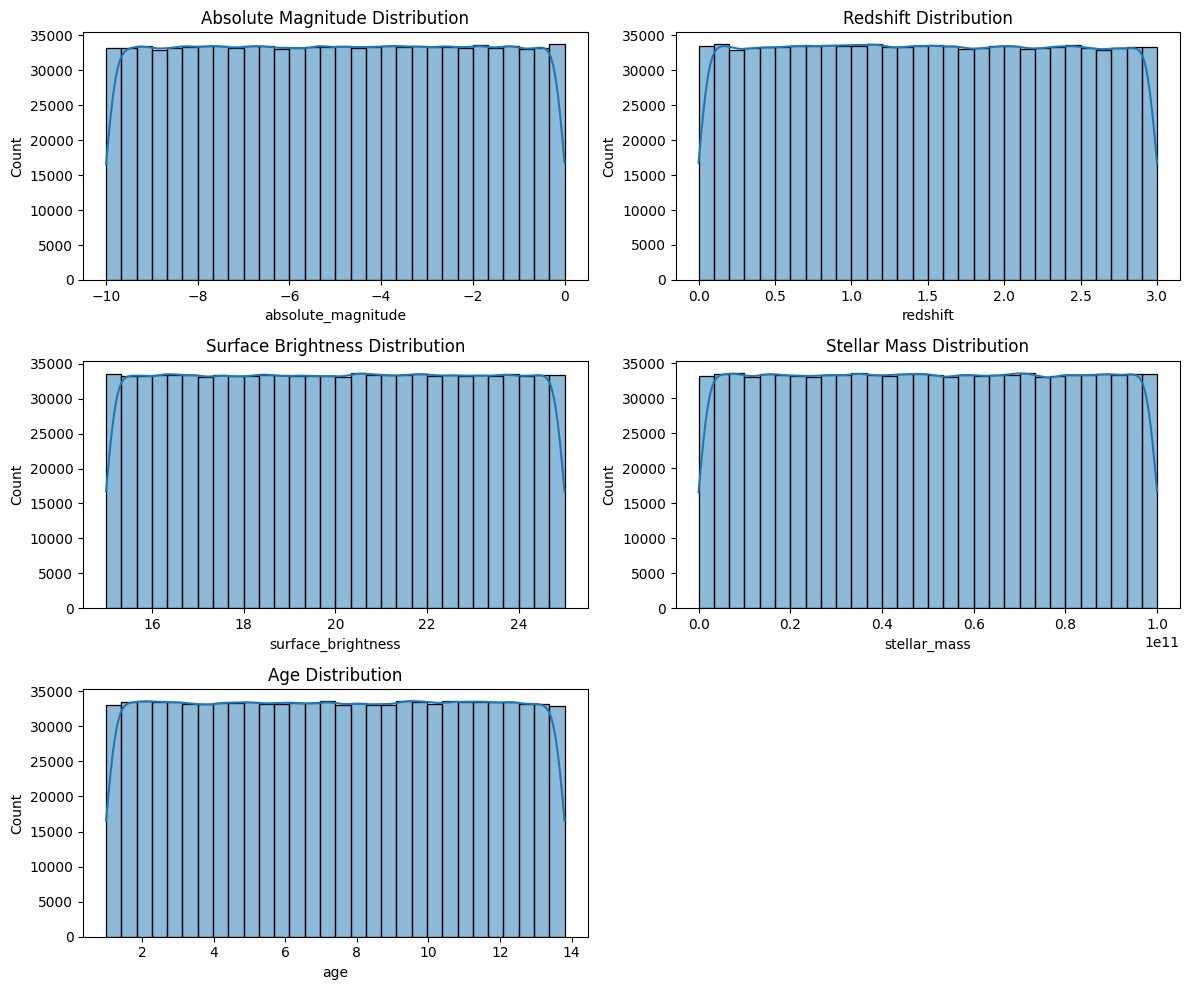

In [ ]:
# import requured libraries  
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Ensure the 'data' directory exists
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Ensure the 'models' directory exists
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Generate and save synthetic data
def generate_and_save_data():
    np.random.seed(42)
    data_size = 1000000  # 1 million samples

    # Generate features with appropriate names and random values
    absolute_magnitude = np.random.uniform(-10, 0, data_size)  # Example range for magnitudes
    redshift = np.random.uniform(0, 3, data_size)  # Redshift values
    surface_brightness = np.random.uniform(15, 25, data_size)  # Surface brightness in mag/arcsec^2
    stellar_mass = np.random.uniform(1e6, 1e11, data_size)  # Stellar mass in solar masses
    age = np.random.uniform(1, 13.8, data_size)  # Age in billion years

    # Generate random labels: 0 for star, 1 for galaxy, 2 for quasar
    labels = np.random.choice([0, 1, 2], size=data_size, p=[0.5, 0.3, 0.2])

    # Create DataFrame
    df = pd.DataFrame({
        'absolute_magnitude': absolute_magnitude,
        'redshift': redshift,
        'surface_brightness': surface_brightness,
        'stellar_mass': stellar_mass,
        'age': age,
        'class': labels
    })
    df.to_csv(os.path.join(data_dir, 'sdss.csv'), index=False)

generate_and_save_data()

# Load and preprocess data
def load_data(file_path=os.path.join(data_dir, 'sdss.csv')):
    data = pd.read_csv(file_path)
    return data

def preprocess_data(data):
    data = data.dropna()  # Drop missing values
    features = data.drop('class', axis=1)
    labels = data['class']
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Build the model
def build_model():
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    return model

# Train the model
def train_model(model, x_train, y_train):
    model.fit(x_train, y_train)
    return model

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Star', 'Galaxy', 'Quasar'], yticklabels=['Star', 'Galaxy', 'Quasar'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    return accuracy

# Save the model
def save_model(model):
    model_path = os.path.join(model_dir, 'star_galaxy_quasar_model.joblib')
    joblib.dump(model, model_path)

# Plot feature importances
def plot_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 8))
    sns.barplot(x=importances[indices], y=[features.columns[i] for i in indices], palette='viridis')
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

# Plot data distributions
def plot_data_distributions(data):
    plt.figure(figsize=(12, 10))
    plt.subplot(3, 2, 1)
    sns.histplot(data['absolute_magnitude'], bins=30, kde=True)
    plt.title('Absolute Magnitude Distribution')

    plt.subplot(3, 2, 2)
    sns.histplot(data['redshift'], bins=30, kde=True)
    plt.title('Redshift Distribution')

    plt.subplot(3, 2, 3)
    sns.histplot(data['surface_brightness'], bins=30, kde=True)
    plt.title('Surface Brightness Distribution')

    plt.subplot(3, 2, 4)
    sns.histplot(data['stellar_mass'], bins=30, kde=True)
    plt.title('Stellar Mass Distribution')

    plt.subplot(3, 2, 5)
    sns.histplot(data['age'], bins=30, kde=True)
    plt.title('Age Distribution')

    plt.tight_layout()
    plt.show()

# Main function to run the project
def main():
    data = load_data()
    plot_data_distributions(data)  # Visualize the data distributions
    x_train, x_test, y_train, y_test = preprocess_data(data)
    model = build_model()
    model = train_model(model, x_train, y_train)
    evaluate_model(model, x_test, y_test)
    save_model(model)
    plot_feature_importances(model, x_train)

if __name__ == '__main__':
    main()